# Introduction to Data Science – Homework 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, January 28, 11:59pm.

This homework is designed to reinforce the skills we covered in the last week including various descriptive statistics. Make sure to go through the lectures again in case you have any trouble.

**Note: Please provide comments describing what your code was doing at each stage**.

**Note: Please fill the cell that says `Your Interpretation` or `Your description` in the below code**.

## Your Data
Fill out the following information: 

*First Name:* Jack   
*Last Name:* Perry   
*E-mail:* jackperrypotus@gmail.com   
*UID:* u1165142

## Part 1: Vector data

We first will work with a vector of monthly average temperatures for Snowbird, UT, which we downloaded from [NOAA](https://www.ncdc.noaa.gov/). The data is included in this repository in the file `snowbird.csv`.

The data is stored in the CSV format, which is a simple textfile with 'Comma Separated Values'.
To load the data, we use the read_csv function from the pandas library. The following code reads the file and stores it in a vector:

In [46]:
# import the csv library
import csv
# import the math library we'll use later
import math
# import the pandas library
import pandas as pd

# read in and print the data
data = pd.read_csv("snowbird.csv")
print(data)

# define vectors of interest
temperature_vector = data["TAVG"].tolist()
precipitation_vector = data["PRCP"].tolist()
        
# print the vector to see if it worked
print (temperature_vector)
print (precipitation_vector)

       DATE  PRCP  TAVG
0   2010-01  7.39  27.5
1   2010-02  2.99  23.8
2   2010-03  5.88  29.0
3   2010-04  9.69  33.0
4   2010-05  6.30  37.2
..      ...   ...   ...
75  2016-04  7.19  38.0
76  2016-05  5.40  42.8
77  2016-06  1.20  59.2
78  2016-07  0.00  62.9
79  2016-08  1.89  60.4

[80 rows x 3 columns]
[27.5, 23.8, 29.0, 33.0, 37.2, 51.5, 61.7, 58.0, 54.1, 42.4, 27.2, 27.7, 23.7, 22.0, 28.5, 30.4, 38.6, 50.1, 60.4, 62.2, 53.8, 40.7, 28.9, 26.0, 27.4, 23.4, 34.1, 38.4, 44.8, 56.3, 62.3, 62.8, 53.8, 41.0, 35.3, 22.5, 23.7, 21.8, 31.2, 32.3, 44.0, 56.6, 62.9, 60.9, 50.4, 37.7, 33.9, 22.6, 27.2, 26.0, 31.1, 34.9, 45.6, 52.4, 63.5, 56.0, 53.8, 44.8, 30.8, 27.1, 31.5, 31.4, 36.6, 36.0, 42.6, 59.6, 58.4, 59.9, 55.2, 45.2, 27.6, 22.8, 25.1, 30.4, 31.7, 38.0, 42.8, 59.2, 62.9, 60.4]
[7.39, 2.99, 5.88, 9.69, 6.3, 2.2, 1.0, 3.09, 1.09, 7.8, 9.7, 12.89, 3.4, 7.2, 8.09, 13.79, 9.99, 2.2, 0.6, 2.3, 2.29, 5.2, 4.69, 1.9, 6.6, 5.6, 5.4, 5.69, 2.6, 0.0, 2.09, 0.59, 2.2, 3.2, 6.19, 7.7, 4.4, 2.8,

We'll next use descriptive statistics to analyze the data in `temperature_vector`.

In this problem, we'll do calculations that are also available in NumPy. For the purpose of this homework, however, **we want you to implement the solutions using standard python functionality and the math library, and then check your results using functions in NumPy** . 

See the the [NumPy library](http://docs.scipy.org/doc/numpy-1.11.0/reference/routines.statistics.html) documentation and include the checks as a separate code cell. 

### Task 1.1: Calculate the Sum of a Vector

Write a function that calculates and returns the sum of a vector that you pass into it. 

Pass the temperature and precipitaton vector into this function and print the result.

In [5]:
#Define a function that takes in a vector
def sum_vector(a):
    #Return the sum for the values in each row of the vectors
    return sum(row for row in a)

#Print the results of passing the vectors into the functions
print(sum_vector(temperature_vector))
print(sum_vector(precipitation_vector))

3269.0000000000005
350.0999999999998


In [16]:
#Check the results by importing numpy and using the np.sum() function
import numpy as np
print(np.sum(temperature_vector))
print(np.sum(precipitation_vector))

3269.0
350.1


### Task 1.2: Calculate the Mean of a Vector

Write a function that calculates and returns the [arithmetic mean](https://en.wikipedia.org/wiki/Arithmetic_mean) of a vector that you pass into it. Use your above defined sum function to calculate sum of all the elements of a vector.

Pass the temperature and precipitaton vector into this function and print the result. Provide a written interpretation of your results (e.g., "The mean temperature for Snowbird is XXX degrees Fahrenheit. The mean precipitation is XXX inches.")

In [66]:
# your code goes here
def arithmetic_mean(d):
    return sum(d) / len(d)
    
print(arithmetic_mean(temperature_vector))
print(arithmetic_mean(precipitation_vector))

40.862500000000004
4.376249999999997


In [7]:
# check results using Numpy
import numpy as np
print(np.mean(temperature_vector))
print(np.mean(precipitation_vector))

40.8625
4.376250000000001


**Your Interpretation:** There were very small differences between the numpy calculation and the direct calculation of the mean. The difference only happened at a very small decimal level, but is likely due to the more intricate computation that is required by the computer to perform such an operation. 

### Task 1.3: Calculate the Median of a Vector
Write a function that calculates and returns the [median](https://en.wikipedia.org/wiki/Median) of a vector. Pass the temperature vector into this function and print the result. Make sure that your function works for both vectors with an even and odd number of elements. In the case of an even number of elements, use the mean of the two middle values. Provide a written interpretation of your results.

Hint: the [`sorted()`](https://docs.python.org/3/library/functions.html#sorted) function might be helpful for this.

In [15]:
#Define the function
def median(numbers):
    #Sort the numbers in ascending order to calculate the median value
    numbers.sort()
    #Check if the amount of numbers is even, and if so, find the average of those middle numbers
    if len(numbers) % 2 == 0:
        median = (numbers[int(len(numbers)/2)] + numbers[int(len(numbers)/2) - 1])/2
    #Else, print just the middle number
    else:
        median = numbers[int(len(numbers)/2)]
    #Return the median value
    return median

#Print the two vectors into the function
print(median(temperature_vector))
print(median(precipitation_vector))

37.85
4.045


In [9]:
# check results using Numpy
print(np.median(temperature_vector))
print(np.median(precipitation_vector))

37.85
4.045


**Your Interpretation:** The median is relatively easy to compute, as it is just the middle value in an ordered list. There were no differences in the values between numpy and the direct method of calcuating the median. This is to be expected as no really large mathematical calculations were taking place.

### Task 1.4: Calculate the Variance of a Vector

Write a function that calculates and returns the [variance](https://en.wikipedia.org/wiki/Variance) of a vector. Pass the temperature and precipitation vectors into this function and print the result. Provide a written interpretation of your results. Is the variance high? Why, Why not? 

The variance is the average of the squared deviations from the mean, i.e.,

$$ Var(X) = {\sigma}^{2} = \frac{1}{N} \sum_{i=1}^{N} {{(x_i - \mu)}^2} $$

where $\mu$ is the mean of the vector. Hint: use your mean function to calculate it.

In [74]:
#Define the function
def variance_vector(vector):
    #Find first the mean of the vector to use as mu
    mean = sum(vector) / len(vector)
    #Set variance to 0 to be added to
    variance = 0
    #Go through values in the vector
    for number in vector:
        #For each number in the vector, run it through the variance operation
        variance += (number - mean) ** 2
    #Divide the sum by 1/N like is mentioned in the equation given
    variance = variance / len(vector)
    return variance

#Print both of the vectors to see the results
print(calculate_variance(temperature_vector))
print(calculate_variance(precipitation_vector))

183.65334374999995
7.9548509375000025


In [77]:
# check results using Numpy
print(np.var(temperature_vector))
print(np.var(precipitation_vector))

183.65334374999998
7.9548509375


**Your Interpretation:** Both methods (direct and numpy) produced approximatley the same results, with very minor decimal differences. This can be expected in an equation like that of variance. This is used when determining how distributed a random variable is. 

### Task 1.5: Histogram

Write a function that takes a vector and an integer `b` and calculates a [histogram](https://en.wikipedia.org/wiki/Histogram) with `b` bins. The function should return an array containing two arrays. The first should be the counts for each bin, the second should contain the borders of the bins.

For `b=6` for the temperature vector, your output should look like this: 

`[[20, 16, 11, 6, 11, 16], [21.8, 28.75, 35.7, 42.650000000000006, 49.6, 56.55, 63.5]]`

Here, the first array gives the size of these bins, the second defines the bands that are equally spaced between minimum and maximum value. That is, the first band from 21.8-28.75 has 20 entries, the second, from 28.75-35.7 has 16 entries, etc. 


Calculate the histogram for precipitation and temperature when b=5. Once you have the calculated bins and values, plot the histogram for precipitaion and temperature using `hist` function in `matplotlib.pyplot` library. Provide a written interpretation of your results. Comment on the shape of each histogram; is it unimodal or bimodal? Is the distribution skewed (if so, in which direction)?

In [30]:
#Define the functionfor a histogram that takes in a vector and a number of bins
def histogram(vector, b):
    # Determine the minimum and maximum values in the vector
    min_value = min(vector)
    max_value = max(vector) 
#Make sure that the number of bins is evenly spaced amongst the values in the vector
    bin_size = (max_value - min_value) / b
    bin_borders = np.linspace(min_value, max_value, b + 1)
#Count the number of items in each of the bins
    bin_counts = np.zeros(b)
#Check all of the values in the vector
    for value in vector:
        #
        bin_index = int((value - min_value) / bin_size)
        if bin_index == b:
            bin_index -= 1
        bin_counts[bin_index] += 1 
    return bin_counts, bin_borders

#Print the vector with 6 bins in order to see if the result is correct
histogram(temperature_vector,6)

(array([20., 16., 11.,  6., 11., 16.]),
 array([21.8 , 28.75, 35.7 , 42.65, 49.6 , 56.55, 63.5 ]))

In [59]:
# check results using Numpy
import numpy as np
from matplotlib import pyplot as plt

def calculate_histogram(vector, b):
    #Calculate the min and max values
    min_value = np.min(vector)
    max_value = np.max(vector)
    #Make an array from the min and max values with the bin numbers
    bin_borders = np.linspace(min_value, max_value, b+1)
    #Use numpy to print the histogram with the correct bin borders
    bin_counts, _ = np.histogram(vector, bin_borders)
    return bin_counts, bin_borders

#Run the function with the temperature vector and 6 bins to see if the result holds
calculate_histogram(temperature_vector,6)

(array([20, 16, 11,  6, 11, 16]),
 array([21.8 , 28.75, 35.7 , 42.65, 49.6 , 56.55, 63.5 ]))

**Your interpretation:** The arrays from both of the functions are the same, which is to be expected. This demonstrates well the way that histr

## Part 2: Working with Matrices

For the second part of the homework, we are going to work with matrices. The [dataset we will use](https://www.wunderground.com/history/airport/KSLC/2015/1/1/CustomHistory.html?dayend=31&monthend=12&yearend=2015&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=) contains different properties of the weather in Salt Lake City for 2015 (temperature, humidity, sea level, ...). It is stored in the file [`SLC_2015.csv`](SLC_2015.csv) in this repository.

We first read the data from the file and store it in a nested python array (`weather_matrix`). A nested python array is an array, where each element is an array itself. Here is a simple example: 

In [39]:
arr1 = [1,2,3]
arr2 = ['a', 'b', 'c']

nestedArr = [arr1, arr2]
nestedArr

[[1, 2, 3], ['a', 'b', 'c']]

We provide you with the import code, which writes the data into the nested list `temperature_matrix`. The list contains one list for each month, which, in turn, contains the mean temperature of every day of that month. 

In [47]:
# initialize the 12 arrays for the months
temperature_matrix = [[] for i in range(12)]

# open the file and append the values of the last column to the array
with open('SLC_2015.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='|')
    # get rid of the header
    next(filereader)
    for row in filereader:
        month = int(row[0].split('/')[0])
        mean_temp = int(row[2])
        temperature_matrix[month-1].append(mean_temp)

print(temperature_matrix)

# the mean tempertarure on August 23. Note the index offset:
print("Mean temp on August 23: " + str(temperature_matrix[7][22]))

[[15, 19, 26, 28, 37, 38, 38, 36, 35, 31, 39, 36, 35, 30, 31, 31, 37, 44, 40, 35, 31, 31, 31, 33, 42, 41, 44, 42, 36, 40, 39], [39, 49, 50, 50, 53, 57, 60, 53, 55, 45, 43, 47, 46, 48, 43, 40, 38, 44, 47, 44, 39, 33, 31, 35, 44, 35, 37, 36], [40, 37, 34, 33, 39, 43, 45, 45, 46, 50, 54, 50, 51, 56, 62, 63, 61, 53, 47, 53, 57, 54, 52, 47, 42, 48, 56, 62, 53, 57, 63], [46, 44, 44, 54, 60, 50, 52, 46, 49, 53, 58, 50, 57, 56, 33, 44, 50, 54, 56, 56, 60, 61, 61, 59, 51, 46, 50, 57, 65, 63], [63, 71, 68, 67, 62, 59, 58, 57, 49, 53, 59, 68, 65, 65, 53, 48, 56, 58, 55, 59, 58, 58, 55, 57, 62, 59, 61, 61, 64, 71, 76], [80, 68, 69, 68, 69, 70, 66, 73, 77, 78, 72, 74, 75, 76, 81, 77, 78, 83, 83, 78, 81, 78, 78, 83, 82, 84, 87, 88, 91, 89], [87, 87, 87, 89, 79, 79, 76, 75, 73, 72, 77, 79, 81, 77, 80, 80, 79, 74, 74, 73, 76, 77, 75, 78, 78, 84, 77, 66, 70, 76, 79], [80, 79, 69, 76, 82, 74, 76, 69, 72, 79, 83, 81, 83, 88, 83, 79, 77, 72, 74, 76, 81, 74, 76, 84, 85, 78, 77, 80, 85, 82, 75], [82, 83, 82

We will next compute the same descriptive statistics as in Part 1 using the nested array `temperature_matrix`. 

In this problem, **we again want you to implement the solutions using standard python functionality and the math library**. We recommend you check your results using NumPy.

**Note:** Since the lists in the matrix are of varying lengths (28 to 31 days) many of the standard NumPy functions won't work directly.

### Task 2.1: Calculates the Avg. Temperature from April to July(4 months)

Write a function that calculates the mean of a matrix from a particular starting month to the ending month. For this version calculate the mean over all elements in the matrix as if it was one large vector. 
Pass in the matrix with the weather data,starting and ending month and return the result. Provide a written interpretation of your results.
Can you use your function from Part 1 and get a valid result?

In [163]:
#Define the function to take in a stop and start date
def calculate_mean_matrix(matrix, start_month, end_month):
    #Make a list to store the mean values from each month
    selected_values = []
    #Parse through all of the values within each month window
    for i in range(start_month-1, end_month):
        #Select the values within the correct matrix range based on index
        for j in range(len(matrix[i])):
            selected_values.append(matrix[i][j])
    #Calculate the mean of the selected values of the correct window selected
    mean = sum(selected_values) / len(selected_values)
    return mean

#Run the function with the specification to check the values
calculate_mean_matrix(temperature_matrix,4,7)

67.29508196721312

In [154]:
# check results with numpy
import numpy as np

#Create function to run numpy 
def mean_of_matrix(matrix, start_month, end_month):
    #Create a vector using the matrix elements with the correct month dates
    vector = np.array([elem for row in matrix[start_month-1:end_month] for elem in row])
    #Calculate the mean of the new vector
    mean = np.mean(vector)
    return mean

#Run the function to check aqainst the other method
mean_of_matrix(temperature_matrix,4,7)

67.29508196721312

**Your Interpretation:** Both methods produced almost identical values, which is good. It was expected to have similar numbers, and this is a useful way of checking for means within a certain frame. 

### Task 2.2:  Calculate the mean of each vector of a matrix

Write a function that calculates the mean temperature of each month and returns an array with the means for each row. Provide a written interpretation of your results. Can you use the function you implemented in Part 1 here efficiently? If so, use it.

In [169]:
def mean_matrix(matrix):
    #Create an empty list to store the means
    means = []
    #Iterate through rows in the matrix
    for row in matrix:
        #Add the mean of each row onto the empty list of means
        means.append(sum(row)/len(row))
    return means

#Print the function with the temperature matrix
mean_matrix(temperature_matrix)

[34.54838709677419,
 44.32142857142857,
 50.096774193548384,
 52.833333333333336,
 60.483870967741936,
 77.86666666666666,
 77.87096774193549,
 78.35483870967742,
 71.43333333333334,
 61.16129032258065,
 39.96666666666667,
 31.548387096774192]

In [112]:
#Import numpy
import numpy as np

#Create the function that takes in the matrix
def row_means(matrix):
    #Make an empty list to store the correct values
    means = []
    #Go through each row
    for row in matrix:
        #Calculate the mean of each row
        mean = np.mean(row)
        #Put the value on the empty list
        means.append(mean)
    return means

#Print the function to return the list of means   
row_means(temperature_matrix)

[34.54838709677419,
 44.32142857142857,
 50.096774193548384,
 52.833333333333336,
 60.483870967741936,
 77.86666666666666,
 77.87096774193549,
 78.35483870967742,
 71.43333333333334,
 61.16129032258065,
 39.96666666666667,
 31.548387096774192]

**Your Interpretation:** This is useful for information like this that has multiple datasets, and it might be useful to look at their means. The numpy function makes these solutions much more simple. 

### Task 2.3:  Calculate the median of a whole matrix

Write a function that calculates and returns the median of a matrix over all values (independent from which row they are coming) and returns it. Provide a written interpretation of your results. Can you use your function from Part 1 and get a valid result?

In [170]:
#Create a function to calculate the median value of a matrix
def median_matrix(matrix):
    #Create a singular vector with all of the matrix elements
    vector = [elem for row in matrix for elem in row]
    #Sort the vector into ascending order
    vector.sort()
    #Find the middle value 
    middle = len(vector) // 2
    #Calculate the medain using previously created code
    if len(vector) % 2 == 0:
        median = (vector[middle - 1] + vector[middle]) / 2
    else:
        median = vector[middle]
    return median

median_matrix(temperature_matrix)

57

In [156]:
# check results with numpy
import numpy as np

def median_of_matrix(matrix):
    #create a vector of the matrix elements
    vector = np.array([elem for row in matrix for elem in row])
    #calculate the overall median of the vector and return it
    median = np.median(vector)
    return median

#Run the function
median_of_matrix(temperature_matrix)

57.0

**Your Interpretation:** We got the results that were expected. Returning the correct median. Very useful information.

### Task 2.4: Calculate the median of each vector of a matrix

Write a function that calculates the median of each sub array (i.e. each row in the temperature_matrix) in the matrix and returns an array of medians (one entry for each row). To do so, use the function you implemented in Part 1. Provide a written interpretation of your results. 

In [96]:
# your code goes here
import numpy as np

def row_medians(matrix):
    #Create an empty list to store median values
    medians = []
    #Go over each row in the matrix
    for row in matrix:
        #Calculate the medain value of each row
        median = np.median(row)
        #Add each of the median values to the new list
        medians.append(median)
    return medians

#Run the function using the temperature matrix to see results
row_medians(temperature_matrix)

[36.0, 44.0, 51.0, 53.5, 59.0, 78.0, 77.0, 79.0, 73.0, 62.0, 40.0, 32.0]

**Your Interpretation:** These functions are made to be relatively simple with the numpy functions. It is quite useful to see the median of each row in the matrix, and we can se that in the month of August the median temperature was the highest. 

### Task 2.5: Calculate the standard deviation of a whole matrix

Write a function that calculates the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of a matrix over all values in the matrix (ignoring from which row they were coming) and returns it. Can you use your function calculating variance from Part 1 and get a valid result? Provide a written interpretation of your results. 

In [175]:
# your code goes here
import math

def std_dev(matrix):
#Use code from before in order to calculate the mean
    mean = 0
    total_elements = 0
    for sublist in matrix:
        for item in sublist:
            mean += item
            total_elements +=1
    mean = mean / total_elements
#Use code from before to determine the variance
    variance = 0
    for sublist in matrix:
        for item in sublist:
            variance += (item - mean)**2
    variance = variance/ total_elements
#Calculate standard deviation by taking the sqrt of variance
    std_dev = math.sqrt(variance)
    #Return the new standard deviation
    return std_dev

#Print the function with the temperature matrix
std_deviation_of_matrix(temperature_matrix)

17.908994103709954

In [179]:
# check results with numpy
def std_deviation(matrix):
    #Convert the matrix into a flat matrix
    flat_matrix = np.concatenate(matrix)
    #Solve for the standard deviation using numpy functions
    std_dev = np.std(flat_matrix)
    #Return the newly calculated standard deviation
    return std_dev

#Print the function with the temperature matrix
print(std_deviation(temperature_matrix))


17.908994103709954


**Your Interpretation:** The two functions produced identical results. seeing these standard deviations can be useful in understanding the spread of all the data. 

### Task 2.6: Calculate the standard deviation of each vector of a matrix

Write a function that calculates the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of each array in the matrix and returns an array of standard deviations (one standard deviation for each row). To do so, use the function calculating variance you implemented in Part 1. 
Pass in the matrix with the temperature data and return the result. Provide a written interpretation of your results - is the standard deviation consistent across the seasons? 

In [181]:
#Use numpy
import numpy as np

#Define the function
def std_deviation_of_rows(matrix):
    #Create empty list to store the standard deviations
    std_devs = []
    #Add to the empty list all of the standard deviations
    for row in matrix:
        std_devs.append(np.std(row))
    return std_devs

#Print the function using the temperature matrix
std_deviation_of_rows(temperature_matrix)

[6.5047809200539595,
 7.343868051591319,
 8.263229231729458,
 6.923791511078947,
 6.272679973334109,
 6.535713852025313,
 5.0208721481423595,
 4.666617114845193,
 7.552850823070421,
 6.937959048194395,
 8.715822138820615,
 8.96890222245524]

**Your Interpretation:** Using numpy for a question like this is much more simple. It is useful to see a function like this in action, seeing the standard deviations in a new list.

## Part 3: Poisson distribution 

In class, we looked at [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution) and [binomial](https://en.wikipedia.org/wiki/Binomial_distribution) discrete random variables. Another example of a discrete random variable is a *Poisson random variable*. 

Read the [wikipedia article on the Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution)

### Part 3.1. Descriptive statistics

Describe what a Poisson random variable is. What is the parameter, $\lambda$? What is the min, max, mean, and variance of a Poisson random variable? 

**Your description:** _A posisson random variable is discrete and describes the number of events that happens within a given time interval. The parameter ($\lambda$) represents the rate at which the events take place. Because you cannot have a negative number of events, the minimum value of a poisson random variable is 0, and with no limit, its maximum of infinity. The mean and variance of the poisson random variable are both equal to the rate ($\lambda$)_

### Part 3.2. Example 

Give an example of an application that is described by a Poisson random variable.

**Your description:** A poisson random variable can be represented by any event that happens in a given time interval. One can use the number of blue jay calls in the span of 2 hours, where $\lambda$ is the number of calls, which represents the mean and variance of the variable as well, and the 2 hours is the given time interval.

### Part 3.3. Probability mass function

For the parameter $\lambda = 4$, plot the probability mass function (you may use scipy). 

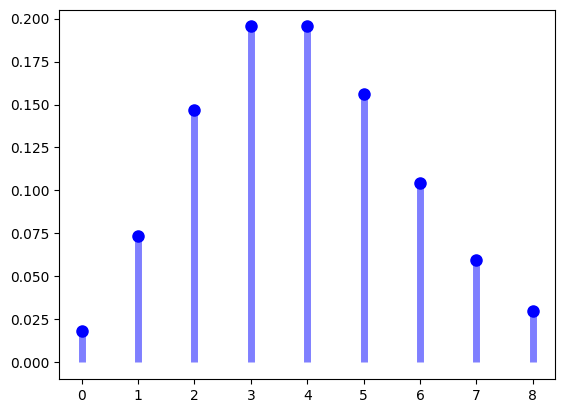

In [172]:
# your code
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

#Set the correct figure as a pmf to be able to see the plot
fig, ax = plt.subplots(1, 1)

#Set the parameter equal to 4
mu = 4
#Create variable x as teh poisson random variable with the .ppf function
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
#Plot the lines and plot of the pmf with the correct variables
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

### Part 3.4. Poission sampling

Write python code that takes 1500 samples from the Poisson distribution with parameter $\lambda = 4$. Make a histogram of the samples and compute the sample mean and variance. How does the histogram compare to the probability mass function?

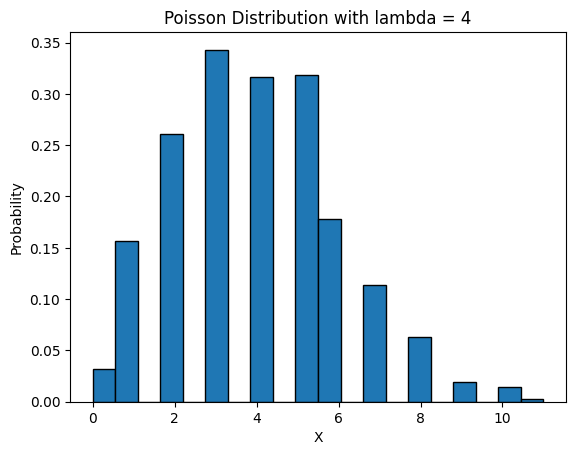

Sample Mean:  4.006
Sample Variance:  4.119297333333333


In [160]:
#import the numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

#set the parameter of the poisson variable equal to 4
lambduh = 4

#generate 1500 samples from the poisson distribution
samples = np.random.poisson(lambduh, 1500)

#Use the plt.hist function and other functions to plot the histogram
plt.hist(samples, bins=20, edgecolor='black', density=True)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Poisson Distribution with lambda = 4')
plt.show()

#Use the np functions to determine the means and sample variances
sample_mean = np.mean(samples)
sample_var = np.var(samples)
print("Sample Mean: ", sample_mean)
print("Sample Variance: ", sample_var)

**Your description:** The distribution looks relatively similar to what was seen in the pmf. This was expected from a poisson random variable. We expected the shapes to be similar. 

**Useful sources:**
    I used some articles to understand the workings of statistical python a little more, including:
        [statology](https://www.statology.org/poisson-distribution-python/#:~:text=The%20Poisson%20distribution%20describes%20the,*%20e%E2%80%93%20%CE%BB%20%2F%20k!) and stats info on the [python website](https://docs.python.org/3/library/statistics.html)